<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_9_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We begin unsupervised estimators.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful for


*   visualization
*   noise filtering
*   feature extraction and engineering



In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Linear algebra essentials

$$
A \boldsymbol{x}=\lambda \boldsymbol{x}
$$

Symmetric matrices

$$
A^{\top}=A
$$

Positive definite matrices

$$
A - \text{positive definite} \Leftrightarrow \boldsymbol{x}^{\top} A \boldsymbol{x} > 0 \text{ for all } \boldsymbol{x}\in \mathbb{R}^n\setminus \boldsymbol{0}
$$

$\text{SVD}$ decomposition

$$
A=U\Sigma V^*
$$

#Introducing Principal Component Analysis

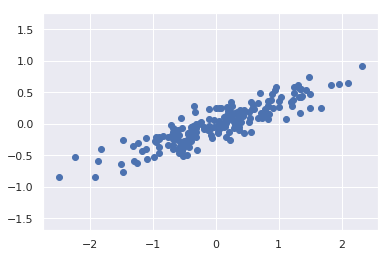

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [0]:
# istead of pedicting, PCA learns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


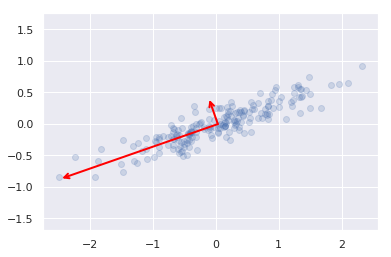

In [0]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)
  
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
#vectors represent the principal axes of the data

##PCA as dimensionality reduction

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


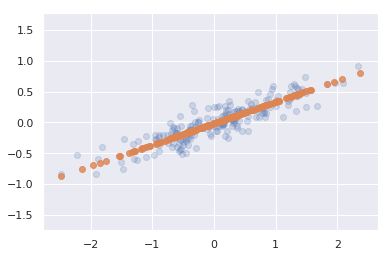

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
# old + projected data

##PCA for visualization: Handwritten digits

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
from sklearn.decomposition import PCA
# images 8x8 = 64 dimensions, reduce to 2

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


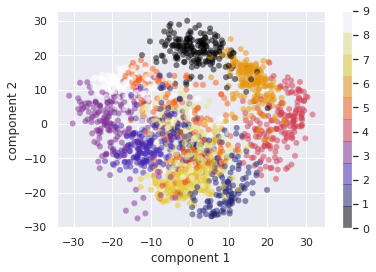

In [6]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [9]:
pca = PCA(3) # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [12]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in digits.target]
#['rgba(' + ','.join([str(r*255), str(g*255), str(b*255)]) + ', 255)' for r,g,b in zip(R,G,B)]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers', 
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False, 
                  title_text="Color scale demonstration",
                  scene={"xaxis": {"title": "R"},
                         "yaxis": {"title": "G"},
                         "zaxis": {"title": "B"}},
                  showlegend=False)
      
fig.show()

##Choosing the number of components

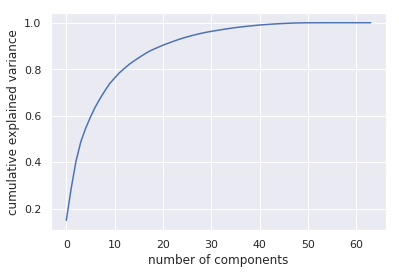

In [0]:
# the cumulative explained variance ratio as a function of the number of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we’d need about 20 components to retain 90% of the variance

#PCA as Noise Filtering

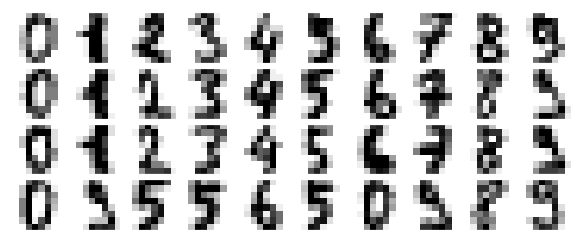

In [0]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

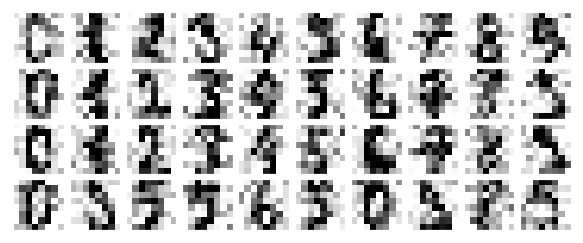

In [0]:
# add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [0]:
# let's retain 50% of variation

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

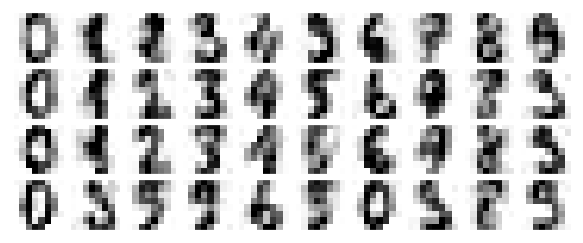

In [0]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#Example: Eigenfaces

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized') # big dataset, use randomized solver
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

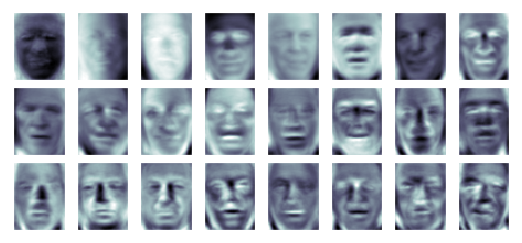

In [0]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

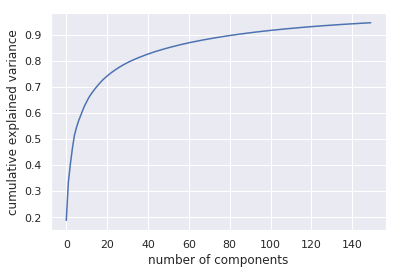

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

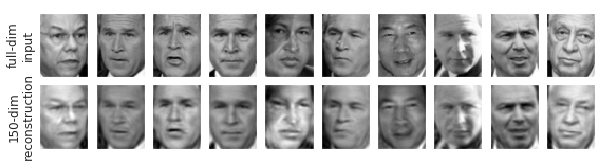

In [0]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
  
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data

#Principal Component Analysis Summary

PCA’s main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.